# Visualization of Results

There are a variety of ways to visulize DeepTCR results at both the sequence and repertoire/sample level. Often users would like to visualize how various sequences are related as well as how various repertoires/samples are related.

## Sequence Visualization

In order to view how individual sequences are related, we can use the UMAP_Plot function with various inputs to create a variety of visualization.First, we will load the data, train the VAE, andc cluster the data via PhenogGraph.

In [1]:
%%capture
import sys
sys.path.append('../../')
from DeepTCR.DeepTCR import DeepTCR_U

# Instantiate training object
DTCRU = DeepTCR_U('Tutorial')

#Load Data from directories
DTCRU.Get_Data(directory='../../Data/Murine_Antigens',Load_Prev_Data=False,aggregate_by_aa=True,
               aa_column_beta=0,count_column=1,v_beta_column=2,j_beta_column=3)

#Train VAE
DTCRU.Train_VAE(Load_Prev_Data=False)

#Cluster Sequences
DTCRU.Cluster(clustering_method='phenograph')

We can now call the UMAP_Plot command to visualize the sequences in 2-dimensional space.


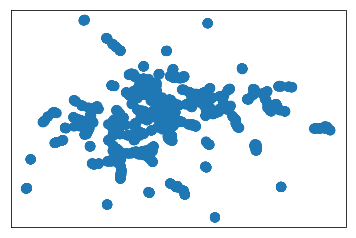

In [2]:
DTCRU.UMAP_Plot()

We first ran the command without any inputs, so all we see are all the sequences in 2D. Now, we can actually re-run this command and use the Load_Prev_Data parameter and set it to True so we don't have to recompute the UMAP dimensionality reduction step. We can now also color code the sequences by their class label.

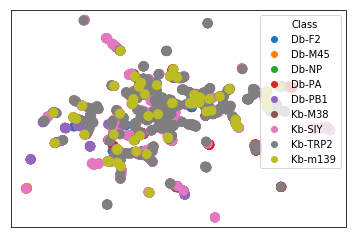

In [3]:
DTCRU.UMAP_Plot(Load_Prev_Data=True,by_class=True)

We can also color code the sequences by their sample label.

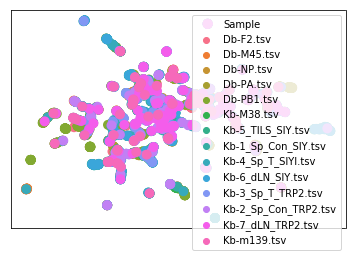

In [4]:
DTCRU.UMAP_Plot(Load_Prev_Data=True,by_sample=True)

and by clustering solution...

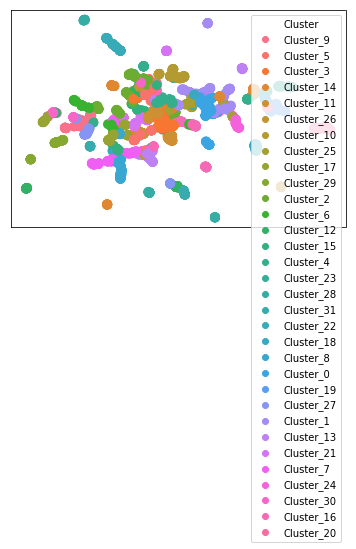

In [5]:
DTCRU.UMAP_Plot(Load_Prev_Data=True,by_cluster=True)

We can also turn the legend off.

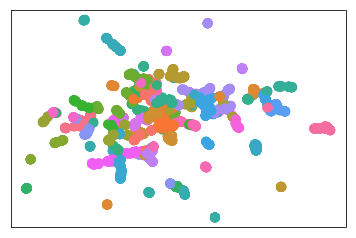

In [6]:
DTCRU.UMAP_Plot(Load_Prev_Data=True,by_cluster=True,show_legend=False)

We can also change the size of the points manually.

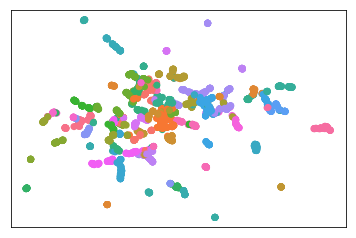

In [7]:
DTCRU.UMAP_Plot(Load_Prev_Data=True,by_cluster=True,show_legend=False,scale=50)

Or set the size of the points to the frequency of the sequence in its reperoire.

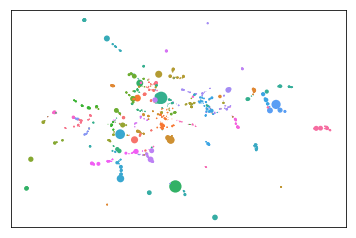

In [8]:
DTCRU.UMAP_Plot(Load_Prev_Data=True,by_cluster=True,show_legend=False,freq_weight=True,scale=500)

And finally change the transparency of the points.

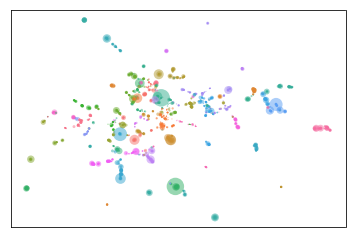

In [9]:
DTCRU.UMAP_Plot(Load_Prev_Data=True,by_cluster=True,show_legend=False,freq_weight=True,scale=1000,alpha=0.5)

## Repertoire Visualization

In order to visualize how various repertoires are related, we created a method that constructs a dendorgram based on how related two repertoires are to each other. Within each leaf of the dendrogram is a two dimensional representation of the repertoire derived from a UMAP dimensionality algorithm.The way this algorithm works is that it begins by clustering all the sequences in all the samples. It then measusre the proportion of each sample in every cluster. This provides a vector of cluster proportions that sums to 1.We can then measure the distance between samples by one of the distance_metric options. This distance metric is used to create the dendrogram. Here we are specificying how many jobs to use for the parellelizable operations (i.e. clustering), the distance metric, and some parameters that adjust the dendorgram visuzliation. These will often need to be tuned for a given figure.

UMAP transformation...
PhenoGraph Clustering...
Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.7377116680145264 seconds
Jaccard graph constructed in 3.7391889095306396 seconds
Wrote graph to binary file in 0.37728404998779297 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.889043
Louvain completed 21 runs in 3.102454423904419 seconds
PhenoGraph complete in 7.977936506271362 seconds
Clustering Done


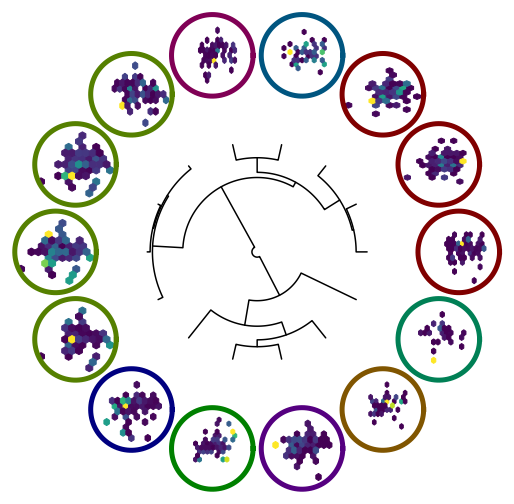

In [10]:
DTCRU.Repertoire_Dendrogram(n_jobs=40,distance_metric='KL',dendrogram_radius=0.20,repertoire_radius=0.35)
                           

We note that the figure needs some adjustment, so we can use the Load_Prev_Data parameter to quickly adjust the formatting of the figure.

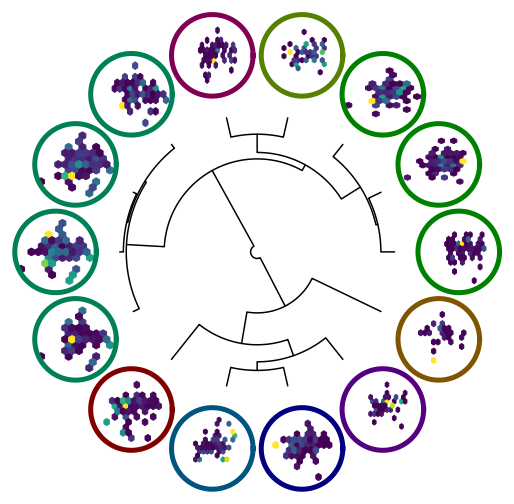

In [11]:
DTCRU.Repertoire_Dendrogram(n_jobs=40,distance_metric='KL',dendrogram_radius=0.25,repertoire_radius=0.35,Load_Prev_Data=True)


We can see how various repertoires are structurally related. In addition, the color coding denotes the class label provided to DeepTCR. Finally, through the use of hexbin plots, we can see how the repertoires are distributed in 2D space.

Furthermore, we can also change the granularity of the hexbin plots with the gridsize parameter.

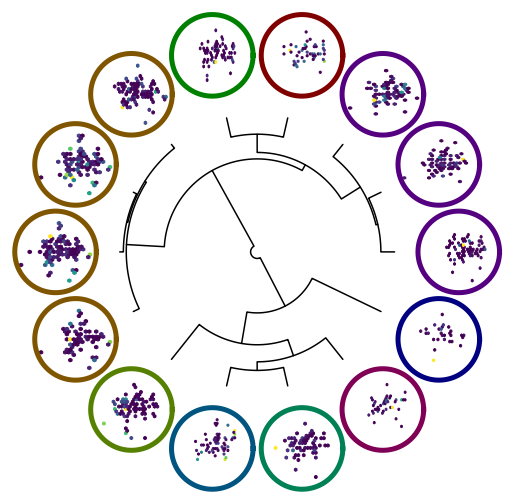

In [12]:
DTCRU.Repertoire_Dendrogram(gridsize=20,n_jobs=40,distance_metric='KL',dendrogram_radius=0.25,repertoire_radius=0.35,Load_Prev_Data=True)